Проектная работа по модулю “Математика и статистика в Python”
1. Загрузить файл hr.csv.  
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3. Рассчитать и визуализировать корреляционную матрицу для переменных.
4. Визуализировать несколько взаимосвязей между переменными.
5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6. Рассчитать сколько работников работает в каждом департаменте.
7. Показать распределение сотрудников по зарплатам.
8. Показать распределение сотрудников по зарплатам совместно с департаментами.
9. Сколько сотрудников покинули компанию.
10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import statistics
from scipy import stats
%matplotlib inline

### 01. Загрузить файл hr.csv

In [3]:
# df = pd.read_csv('F:\Program\git_base\GitHub\MyRepo\PYDA_FIN\HR.csv')
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Описание датафрейма**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


* **satisfaction_level** - Уровень удовлетворенности сотрудника (десятичное, от 0 до 1)  
* **last_evaluation** - Последняя оценка сотрудника
* **number_projects** -  Количество выполненных проектов
* **average_monthly_hours** - Среднее количество рабочих часов за месяц
* **time_spend_company** -  Время работы в компании в годах
* **work_accident** -  У сотрудника был несчастный случай на рабочем месте
* **left** -  Работник уволился (1 или 0)
* **promotion_last_5years** -  Было ли у сотрудника повышение за последние 5 лет
* **sales** -  Отдел, в котором работает сотрудник
* **salary** - Уровень заработной платы (высокий, средний, низкий)

### 02. Рассчитать основные статистики для переменных(среднее,медиана, мода, мин/макс, сред. отклонение)**

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
# Отдельно посчитаем моду по всем признакам
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Отдельно посчитаем моду по признакам object 
df.select_dtypes(include='object').mode()

,sales,salary
0,sales,low


### 03. Рассчитать и визуализировать корреляционную матрицу для переменных.

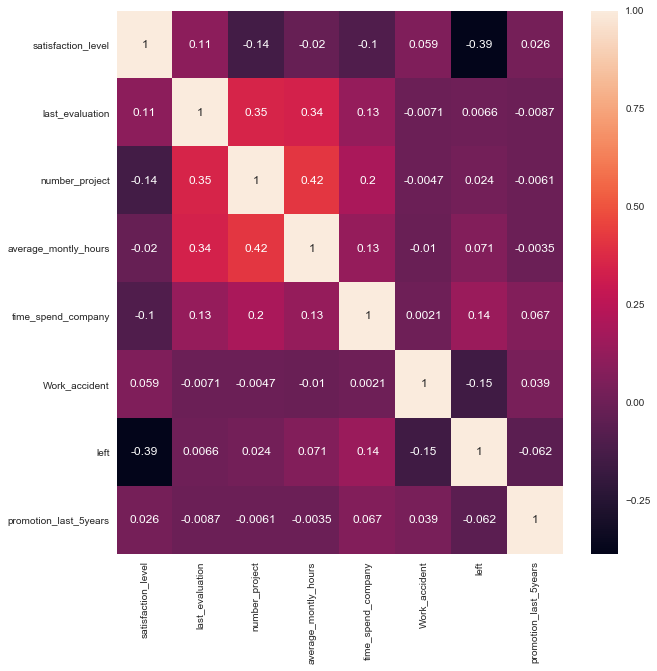

In [12]:
sns.set(rc=({'figure.figsize':(10, 10)}))
sns.heatmap(df.corr(), annot=True, xticklabels=df.corr().columns.values, yticklabels=df.corr().columns.values)

Существенной корреляции между параметрами не найдено. 

### 04. Визуализировать несколько взаимосвязей между переменными.

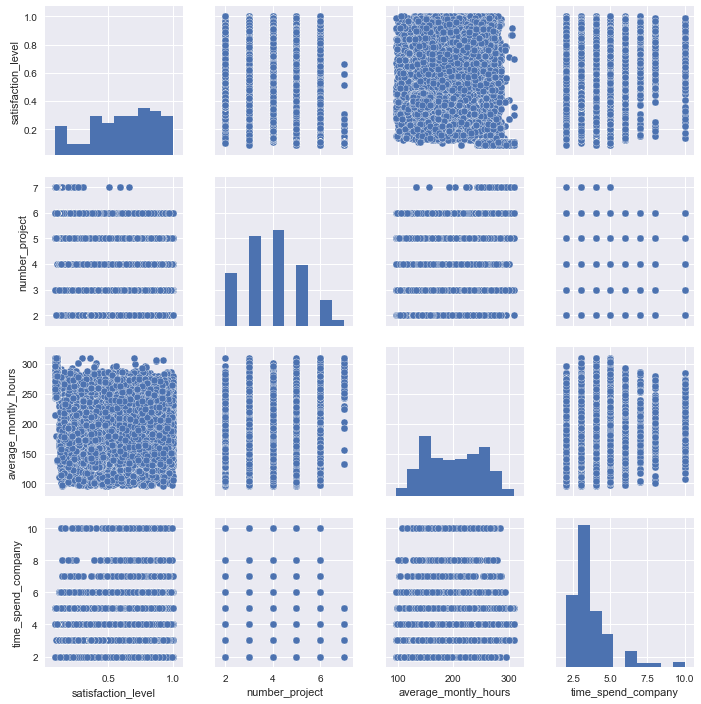

In [13]:
sns.pairplot(df[['satisfaction_level', 'number_project', 'average_montly_hours', 'time_spend_company']])

Опять же не наблюдается корреляции между параметрами

### 05. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [18]:
print(stats.ttest_ind(df['number_project'], df['average_montly_hours']))
print(stats.ttest_ind(df['satisfaction_level'], df['average_montly_hours']))
print(stats.ttest_ind(df['satisfaction_level'], df['last_evaluation']))

Ttest_indResult(statistic=-483.54229603425085, pvalue=0.0)
Ttest_indResult(statistic=-491.5064991295991, pvalue=0.0)
Ttest_indResult(statistic=-41.89868154070206, pvalue=0.0)


### 06. Рассчитать сколько работников работает в каждом департаменте.

In [31]:
df.groupby('sales').salary.count()

sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: salary, dtype: int64

### 07. Показать распределение сотрудников по зарплатам

In [43]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

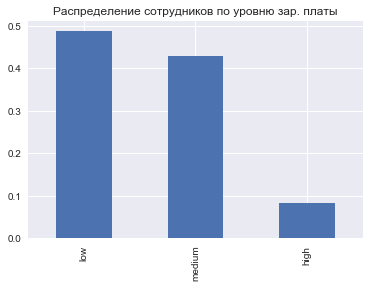

In [56]:
df.salary.value_counts(normalize=True).plot(kind='bar', title='Распределение сотрудников по уровню зар. платы')

### 08. Показать распределение сотрудников по зарплатам совместно с департаментами.

In [62]:
salary_group = df.groupby(['sales', 'salary']).count()[['satisfaction_level']].rename(columns={"satisfaction_level":"count_by_salary"}).reindex(level=1, index = ['high', 'medium', 'low'])
salary_group

count_by_salary
sales       salary                 
IT          high                 83
            medium              535
            low                 609
RandD       high                 51
            medium              372
            low                 364
accounting  high                 74
            medium              335
            low                 358
hr          high                 45
            medium              359
            low                 335
management  high                225
            medium              225
            low                 180
marketing   high                 80
            medium              376
            low                 402
product_mng high                 68
            medium              383
            low                 451
sales       high                269
            medium             1772
            low                2099
support     high                141
            medium              942
            low                1146
technical   high                201
            medium             1147
            low                1372

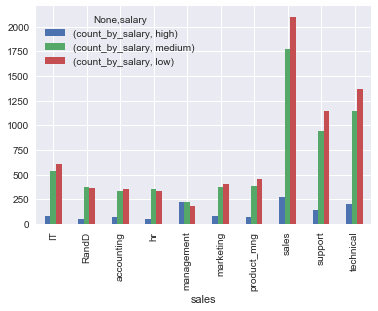

In [63]:
# Видим, что большее количество сотрудников с высокими зарплатами в департаменте продаж, наименьшее - в hr.
salary_group.unstack('salary').plot(kind='bar')

### 09. Cколько сотрудников покинуло компанию

In [75]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [76]:
df['left'].value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

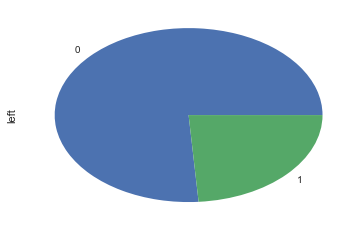

In [78]:
df['left'].value_counts().plot(kind='pie')

### 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [79]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Предварительные наблюдения: 
* Уровень удовлетворения у оставшихся выше, чем у уволившихся
* Уволившиеся работали в компании дольше и больше, чем оставшиеся
* Уволившиеся реже повышались

Проверяем статистическую значимость данных сравнений при помощи t-test.   
p-value < 0.05, значит разница в средних не обусловлена случаными колебаниям.

In [86]:
print(stats.ttest_ind(df[df['left']==1]['satisfaction_level'], df[df['left']==0]['satisfaction_level']))
print(stats.ttest_ind(df[df['left']==1]['average_montly_hours'], df[df['left']==0]['average_montly_hours']))
print(stats.ttest_ind(df[df['left']==1]['promotion_last_5years'], df[df['left']==0]['promotion_last_5years']))

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)
Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)
Ttest_indResult(statistic=-7.581195349367637, pvalue=3.624047224146943e-14)


#### Гипотеза 01. Люди с высокой зарплатой уходят реже

Text(0,0.5,'Кол-во сотрудников')

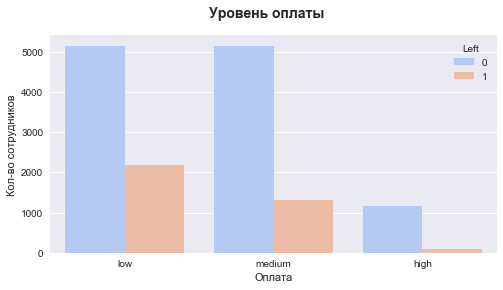

In [89]:
# Шаг 00. Для удобства сформулируем нулевую гипотезу: Увольнения одинаковы для всех уровней оплаты
# Шаг 01. Посмотрим распределение по уровню зарплаты и кол-ву ушедших
fig = plt.figure(figsize = (8,4))
sns.countplot(df['salary'], hue=df['left'], palette='coolwarm')
plt.suptitle('Уровень оплаты', fontsize=14, fontweight='bold')
plt.legend(title='Left')
plt.xlabel('Оплата')
plt.ylabel('Кол-во сотрудников')

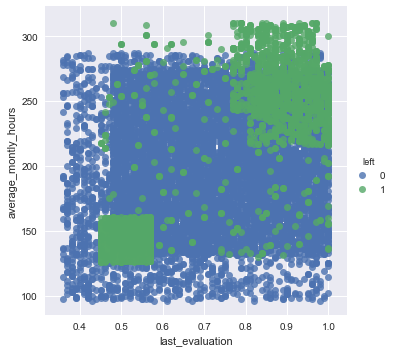

In [138]:
sns.lmplot(x='last_evaluation', y='average_montly_hours', data=df, hue='left', fit_reg=False)

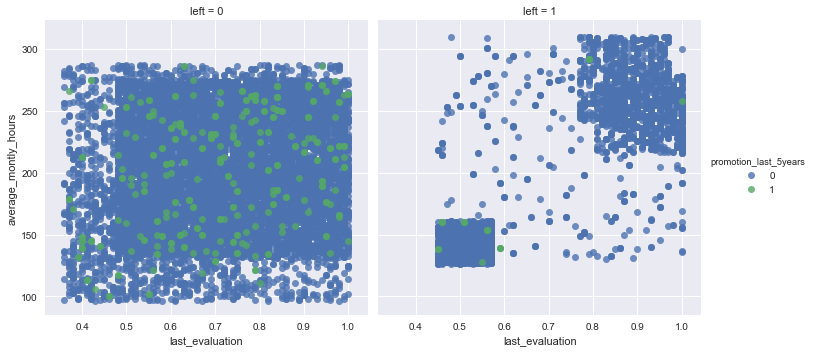

In [140]:
sns.lmplot(x='last_evaluation', y='average_montly_hours', data=df, col='left', hue='promotion_last_5years', fit_reg=False)

Выделяется 2 кластера, среди уволившихся сотрудников:
* Много работают и получили высокую оценку
* Мало работают и получили низкую оценку
В обоих случаях люди не получали продвижения

In [148]:
# Проверим гипотезу: у уволившихся сотрудников не отличались средние оценки
df_mh_prom = df[(df['left']==1) & (df['promotion_last_5years']==1)]['last_evaluation']
df_mh_noprom = df[(df['left']==1) & (df['promotion_last_5years']==0)]['last_evaluation']

In [146]:
len(df_mh_prom), len(df_mh_noprom)

(19, 3552)

In [147]:
df_mh_prom  = df_stay.sample(n=18)
df_mh_noprom = df_away.sample(n=18)
sts.ttest_ind(df_mh_stay, df_mh_away, equal_var = False)

Ttest_indResult(statistic=39.4425488021642, pvalue=2.338747476146965e-306)

In [102]:
# Гипотеза 02. Увольнение не зависит от уровня удовлетворенности
df_stay = df[df['left']==0]['satisfaction_level']
df_away = df[df['left']==1]['satisfaction_level']

In [103]:
len(df_stay), len(df_away)

(11428, 3571)

In [104]:
df_stay = df_stay.sample(n=3500)
df_away = df_away.sample(n=3500)

In [105]:
statistics.variance(df_stay), statistics.variance(df_away)

(0.04703254097905524, 0.0695416873065774)

In [106]:
sts.ttest_ind(df_stay, df_away, equal_var = False)

Ttest_indResult(statistic=39.442548802164204, pvalue=2.3387474761466977e-306)

p-value ниже 0,05 - отвергаем гипотезу

Text(0.5,0,'Employees satifaction level')

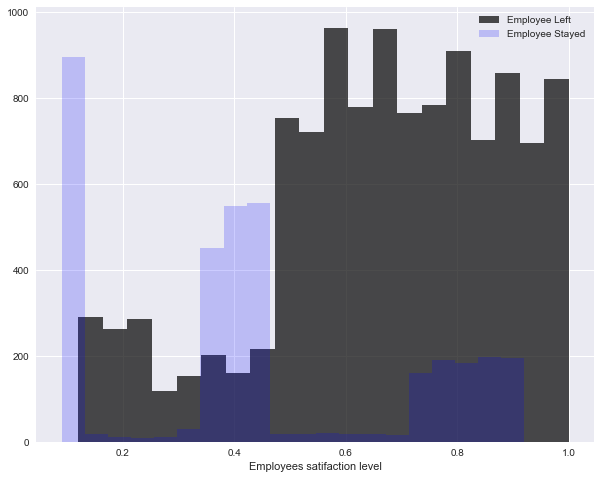

In [112]:
empLeft = df[df['left'] == 0]
empStayed = df[df['left'] == 1]
fig = plt.figure(figsize = (10,8))
plt.hist(empLeft['satisfaction_level'], bins=20, alpha = 0.7, label='Employee Left',color='black')
plt.hist(empStayed['satisfaction_level'],bins=20,alpha = 0.2, label='Employee Stayed',color='blue')
plt.legend()
plt.xlabel('Employees satifaction level')
#plt.ylabel('No of employees')

In [118]:
# Гипотеза 02. Увольнение не зависит от проводимого времени
df_mh_stay = df[df['left']==0]['average_montly_hours']
df_mh_away = df[df['left']==1]['average_montly_hours']

In [119]:
len(df_mh_stay), len(df_mh_away)

(11428, 3571)

In [120]:
df_mh_stay = df_stay.sample(n=3500)
df_mh_away = df_away.sample(n=3500)

In [121]:
sts.ttest_ind(df_mh_stay, df_mh_away, equal_var = False)

Ttest_indResult(statistic=39.4425488021642, pvalue=2.338747476146965e-306)

In [122]:
# p-value ниже 0,05 - отвергаем гипотезу

Ttest_indResult(statistic=-7.581195349367637, pvalue=3.624047224146943e-14)

In [129]:
stats.ttest_ind(df[df['left']==1]['time_spend_company'], df[df['left']==0]['time_spend_company'])

Ttest_indResult(statistic=17.924210234916142, pvalue=4.207680457692835e-71)

In [126]:
print(stats.ttest_ind(df[df['left']==1]['last_evaluation'], df[df['left']==0]['last_evaluation']))

Ttest_indResult(statistic=0.8042416167796329, pvalue=0.4212701963735056)


In [130]:
# Гипотеза - от повышения не зависит уволится человек или нет
stats.ttest_ind(df[df['left']==1]['promotion_last_5years'], df[df['left']==0]['promotion_last_5years'])
# p-value ниже 0,05 - отвергаем гипотезу

Ttest_indResult(statistic=-7.581195349367637, pvalue=3.624047224146943e-14)

Text(0,0.5,'Number of employees')

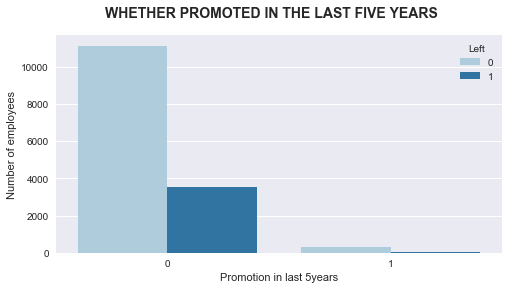

In [131]:
fig = plt.figure(figsize = (8,4))
sns.countplot(df['promotion_last_5years'], hue=df['left'], palette='Paired')
plt.suptitle('WHETHER PROMOTED IN THE LAST FIVE YEARS', fontsize=14, fontweight='bold')
plt.legend(title='Left')
plt.xlabel('Promotion in last 5years')
plt.ylabel('Number of employees')

In [ ]:
Таким образом, наиболее вероятными признакими можно считать:
1. Повышение сотрудника
2. 